# 문제
예약 취소와 관련이 있는 요소들을 파악해보고, 예약 취소율을 줄이기 위한 아이디어 구상

어떤 조건에서 예약 취소가 빈번하게 발생하는지, 예약 취소와 관련이 있는 요소들이 무엇인지 파악

마지막으로 어떻게 하면 예약 취소율을 개선할 수 있을지 아이디어 구상

### 데이터 설명

해당 데이터는 2015.07.01부터 2017.08.31까지의 Resort Hotel과 City Hotel의 예약 데이터를 포함하고 있습니다.

#### 📊 호텔 예약 데이터 컬럼 설명

| 컬럼명 | 설명 |
|------|------|
| hotel | 호텔명 (Resort Hotel 혹은 City Hotel) |
| is_canceled | 호텔 예약이 취소되었는지(1) 혹은 취소되지 않았는지(0)를 나타내는 값 |
| lead_time | 호텔 예약 시점부터 고객의 호텔 도착 시점까지의 기간 (단위: 일) |
| arrival_date_year | 고객의 호텔 도착 연도 |
| arrival_date_month | 고객의 호텔 도착 월 |
| arrival_date_week_number | 고객의 호텔 도착 주 (예: 2015년 3주차 → 3) |
| arrival_date_day_of_month | 고객의 호텔 도착 일 (예: 3월 2일 → 2) |
| stays_in_weekend_nights | 숙박한 주말 밤 수 (토요일~일요일) |
| stays_in_week_nights | 숙박한 주중 밤 수 (월요일~금요일) |
| adults | 예약된 어른 수 |
| children | 예약된 어린이 수 |
| babies | 예약된 아기 수 |
| meal | 예약된 식사 유형<br>• Undefined/SC: 식사 미포함<br>• BB: 조식 포함<br>• HB: 조식 + 추가 식사 1회<br>• FB: 조식·중식·석식 |
| country | 투숙객 출신 국가 (ISO 3155-3:2013 국가 코드) |
| market_segment | 시장 세그먼트 (TA: Travel Agent, TO: Tour Operators) |
| distribution_channel | 예약 유통 채널 (TA: Travel Agent, TO: Tour Operators) |
| is_repeated_guest | 재방문 고객 여부 (재방문: 1, 최초 방문: 0) |
| previous_cancellations | 이전 예약 중 취소한 횟수 |
| previous_bookings_not_canceled | 이전 예약 중 취소하지 않은 횟수 |
| reserved_room_type | 예약한 객실 타입 코드 |
| assigned_room_type | 실제 배정된 객실 타입 코드 |
| booking_changes | 예약 변경 횟수 |
| agent | 예약을 진행한 여행사 ID |
| company | 예약 책임 회사/단체 ID |
| days_in_waiting_list | 예약 대기자 명단에 있었던 일수 |
| required_car_parking_spaces | 요구한 주차 공간 수 |
| total_of_special_requests | 고객의 특별 요청 건수 |
| reservation_status | 예약 최종 상태 (Canceled / Check-Out / No-Show) |
| reservation_status_date | 최종 예약 상태가 기록된 날짜 |


# 기초 작업

In [1]:
# 강사님이 올려주신 ISO 국가 코드
country_codes = {
    "Afghanistan": "AFG", "Albania": "ALB", "Algeria": "DZA", "American Samoa": "ASM", "Andorra": "AND",
    "Angola": "AGO", "Anguilla": "AIA", "Antarctica": "ATA", "Antigua and Barbuda": "ATG", "Argentina": "ARG", 
    "Armenia": "ARM", "Aruba": "ABW", "Australia": "AUS", "Austria": "AUT", "Azerbaijan": "AZE", "Bahamas": "BHS", 
    "Bahrain": "BHR", "Bangladesh": "BGD", "Barbados": "BRB", "Belarus": "BYL", "Belgium": "BEL", "Belize": "BLZ", 
    "Benin": "BEN", "Bermuda": "BMU", "Bhutan": "BTN", "Bolivia": "BOL", "Bosnia and Herzegovina": "BIH", "Botswana": "BWA",
    "Brazil": "BRA", "Brunei Darussalam": "BRN", "Bulgaria": "BGR", "Burkina Faso": "BFA", "Burundi": "BDI", "Cabo Verde": "CPV",
    "Cambodia": "KHM", "Cameroon": "CMR", "Canada": "CAN", "Cayman Islands": "CYM", "Central African Republic": "CAF", 
    "Chad": "TCD", "Chile": "CHL", "China": "CHN", "Colombia": "COL", "Congo (Democratic Republic)": "COD",
    "Congo (Republic)": "COG", "Costa Rica": "CRI", "Cote d'Ivoire": "CIV", "Croatia": "HRV", "Cuba": "CUB", 
    "Cyprus": "CYP", "Czechia": "CZE", "Denmark": "DNK", "Djibouti": "DJI", "Dominica": "DMA", 
    "Dominican Republic": "DOM", "Ecuador": "ECU", "Egypt": "EGY", "El Salvador": "SLV", "Estonia": "EST", 
    "Ethiopia": "ETH", "Fiji": "FJI", "Finland": "FIN", "France": "FRA", "Germany": "DEU",
    "Ghana": "GHA", "Greece": "GRC", "Hong Kong": "HKG", "Hungary": "HUN", "Iceland": "ISL",
    "India": "IND", "Indonesia": "IDN", "Iran": "IRN", "Iraq": "IRQ", "Ireland": "IRL", "Israel": "ISR",
    "Italy": "ITA", "Jamaica": "JAM", "Japan": "JPN", "Jordan": "JOR", "Kazakhstan": "KAZ", "Kenya": "KEN", "Korea (North)": "PRK",
    "Korea (South)": "KOR", "Kuwait": "KWT", "Malaysia": "MYS", "Mexico": "MEX", "Netherlands": "NLD",
    "New Zealand": "NZL", "Norway": "NOR", "Pakistan": "PAK", "Philippines": "PHL", "Poland": "POL", "Portugal": "PRT",
    "Qatar": "QAT", "Russian Federation": "RUS", "Saudi Arabia": "SAU", "Singapore": "SGP", "Spain": "ESP", "Switzerland": "CHE",
    "Taiwan": "TWN", "Thailand": "THA", "Turkey": "TUR", "Ukraine": "UKR", "United Arab Emirates": "ARE", "United Kingdom": "GBR", 
    "United States": "USA", "Vietnam": "VNM"
}

#dict keys와 values 값 변경
country_codes = { v : k for k, v in country_codes.items()}

In [2]:
# 필요한 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# 데이터 짤림 방지
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)

# 시각화 폰트 적용
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 불러오기
hotel_df = pd.read_csv('hotel_data_modified.csv')

# 국가코드 맵핑하기
hotel_df['country'] = hotel_df['country'].map(country_codes)

In [3]:
# 데이터 정보 확인하기
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
# 수치형 데이터 정보 확인하기
hotel_df.describe()


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,8.000000,5.000000


In [5]:
# 범주형 데이터 정보 확인하기
hotel_df.describe(include='object')


,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,reservation_status,reservation_status_date
count,119390,119390,119390,114534,119390,119390,119390,119390,119390,119390
unique,2,12,5,95,8,5,10,12,3,926
top,City Hotel,August,BB,Portugal,Online TA,TA/TO,A,A,Check-Out,2015-10-21
freq,79330,13877,92310,48590,56477,97870,85994,74053,75166,1461


In [6]:
# 데이터 일부 확인하기
hotel_df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,Portugal,Direct,Direct,0,0,0,C,C,3,NaN,NaN,0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,Portugal,Direct,Direct,0,0,0,C,C,4,NaN,NaN,0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,United Kingdom,Direct,Direct,0,0,0,A,C,0,NaN,NaN,0,0,0,Check-Out,2015-07-02


## - 결측값 확인하기

In [7]:
# 결측값 확인
hotel_df.isna().sum()  

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                             4856
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
agent                              16340
company                           112593
days_in_waiting_

In [8]:
# children 고유값 확인 하기
hotel_df['children'].value_counts().sort_index(ascending=True)

children
0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: count, dtype: int64

In [9]:
# agent 고유값 확인하기
hotel_df['agent'].value_counts().sort_index(ascending=True)

agent
1.0      7191
2.0       162
3.0      1336
4.0        47
5.0       330
         ... 
510.0       2
526.0      10
527.0      35
531.0      68
535.0       3
Name: count, Length: 333, dtype: int64

In [10]:
# company 고유값 확인하기
hotel_df['company'].value_counts().sort_index(ascending=True)

company
6.0       1
8.0       1
9.0      37
10.0      1
11.0      1
         ..
531.0     1
534.0     2
539.0     2
541.0     1
543.0     2
Name: count, Length: 352, dtype: int64

결측값 중 children는 일반적으로 0명일때, 미표기 하는 경우로 판단하여 0으로 대체

결측값 중 agent, company, country는 고유값이 0인 경우가 없고, 기존 입력값과 비교하기 위해 0으로 대체

In [11]:
# 결측값을 0으로 대체하기.
hotel_df = hotel_df.fillna(0)

In [12]:
# 결측값 최종 확인
hotel_df.isna().sum()  

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
agent                             0
company                           0
days_in_waiting_list              0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

## - 중복값 확인하기

In [13]:
# 중복값 확인하기
hotel_df[hotel_df.duplicated(keep='first')]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,United Kingdom,Online TA,TA/TO,0,0,0,A,A,0,240.0,0.0,0,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,0.0,0,BB,Portugal,Direct,Direct,0,0,0,A,A,1,250.0,0.0,0,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,0.0,0,HB,0,Direct,Direct,0,0,0,E,E,0,250.0,0.0,0,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,0.0,0,BB,Portugal,Online TA,TA/TO,0,0,0,D,D,0,240.0,0.0,0,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,0.0,0,BB,United Kingdom,Online TA,TA/TO,0,0,0,A,A,0,240.0,0.0,0,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,0.0,0,BB,Germany,Online TA,TA/TO,0,0,0,D,D,0,9.0,0.0,0,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,0,Online TA,TA/TO,0,0,0,D,D,0,9.0,0.0,0,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,0,Online TA,TA/TO,0,0,0,D,D,0,9.0,0.0,0,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,0,Online TA,TA/TO,0,0,0,D,D,0,9.0,0.0,0,0,2,Check-Out,2017-09-03


게스트 별로 고유 식별 번호가 없어서 판단하기 애매했으나,

모든 정보(같은 날, 같은 에이전트를 통하여, 같은 인원수가, 같은 방으로 예약했다)가 같으니 중복된 값이라고 판단하여 제거.

In [14]:
# 중복값 제거하기
hotel_df = hotel_df.drop_duplicates(keep='first')

## - 이상치 확인하기

descirbe을 확인하여 정상적이지 않은 이상치 확인
-> adults가 55명? children이 10명? babies가 10명? -> 확인해보자

<Axes: >

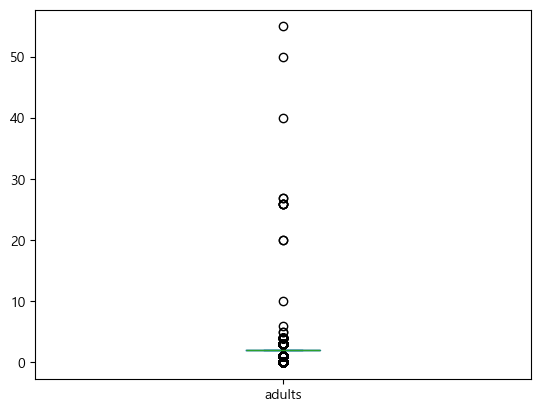

In [15]:
hotel_df['adults'].plot(kind='box')

In [16]:
hotel_df.loc[hotel_df['adults'] > 30]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
1539,Resort Hotel,1,304,2015,September,36,3,0,3,40,0.0,0,BB,Portugal,Direct,Direct,0,0,0,A,A,0,0.0,0.0,0,0,0,Canceled,2015-01-02
1643,Resort Hotel,1,336,2015,September,37,7,1,2,50,0.0,0,BB,Portugal,Direct,Direct,0,0,0,A,A,0,0.0,0.0,0,0,0,Canceled,2015-01-18
2173,Resort Hotel,1,338,2015,October,41,4,2,0,55,0.0,0,HB,Portugal,Direct,Direct,0,0,0,A,A,0,0.0,0.0,0,0,0,Canceled,2015-01-02


<Axes: >

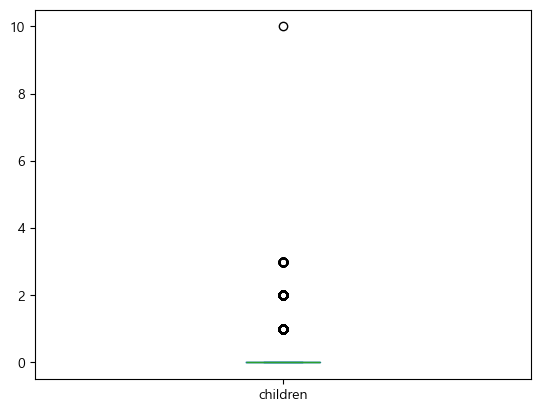

In [17]:
hotel_df['children'].plot(kind='box')

In [18]:
hotel_df.loc[hotel_df['children'] > 5]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
328,Resort Hotel,1,55,2015,July,29,12,4,10,2,10.0,0,BB,Portugal,Offline TA/TO,TA/TO,0,0,0,D,D,2,8.0,0.0,0,0,1,No-Show,2015-07-12


<Axes: >

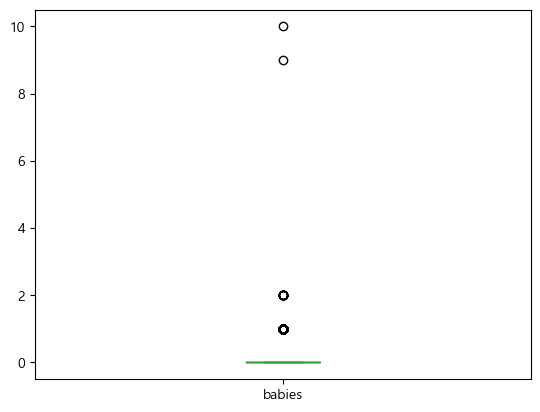

In [19]:
hotel_df['babies'].plot(kind='box')

In [20]:
hotel_df.loc[hotel_df['babies'] > 5]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
46619,City Hotel,0,37,2016,January,3,12,0,2,2,0.0,10,BB,Portugal,Online TA,TA/TO,0,0,0,D,D,1,9.0,0.0,0,0,1,Check-Out,2016-01-14
78656,City Hotel,0,11,2015,October,42,11,2,1,1,0.0,9,BB,United Kingdom,Corporate,Corporate,0,0,0,A,B,1,95.0,0.0,0,0,0,Check-Out,2015-10-14


어른들은 단체로 예약을 했다고 볼 수 있음.

어린이와 아이들이 10명은 많다고 생각해서 잘못된 데이터인가 생각했지만

현실적으로 충분히 가능할 수 있다고 판단.


-> 제외 시킬 이상치는 보이지 않음

# - 데이터 분석

#### - 전체 취소율 확인

In [21]:
# 전체 취소율 확인하기

all_cancel_rate = hotel_df['is_canceled'].mean()
all_cancel_rate

np.float64(0.27693538290324826)

### - 범주형 요소

#### - 호텔별 취소율 확인

In [22]:
# 호텔별 취소비율
hotel_canceled = hotel_df.groupby('hotel')['is_canceled'].mean().sort_values(ascending=False)
hotel_canceled


hotel
City Hotel      0.301921
Resort Hotel    0.237340
Name: is_canceled, dtype: float64

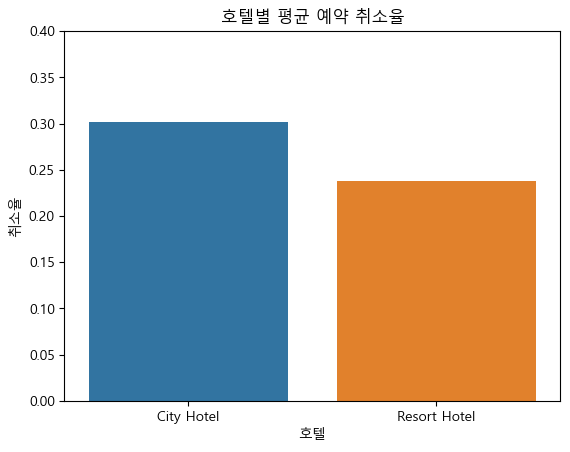

In [23]:
# 시각화
sns.barplot(x=hotel_canceled.index, y=hotel_canceled.values, hue=hotel_canceled.index)
plt.title('호텔별 평균 예약 취소율')
plt.ylabel('취소율')
plt.xlabel('호텔')
plt.ylim(0, 0.4)  
plt.show()

#### - 식사별 취소율 확인

In [24]:
# 식사별 취소비율
meal_canceled = hotel_df.groupby('meal')['is_canceled'].mean().sort_values(ascending=False)
meal_canceled

meal
SC           0.354626
FB           0.276056
HB           0.274693
BB           0.267075
Undefined    0.171247
Name: is_canceled, dtype: float64

In [25]:
# 데이터량 확인하기
hotel_df['meal'].value_counts()

meal
BB           67131
SC            9424
HB            8879
Undefined      473
FB             355
Name: count, dtype: int64

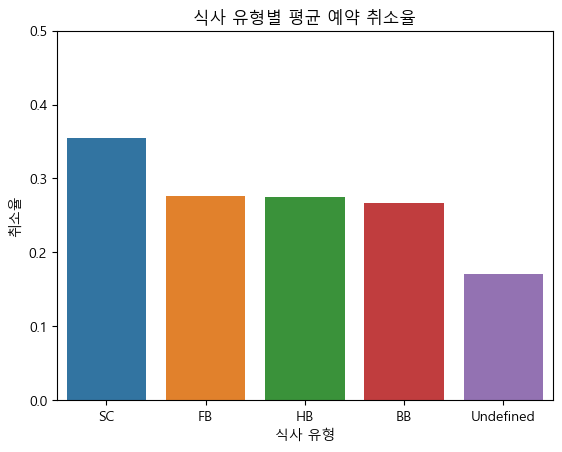

In [26]:
sns.barplot(x=meal_canceled.index, y=meal_canceled.values, hue=meal_canceled.index)
plt.title('식사 유형별 평균 예약 취소율')
plt.ylabel('취소율')
plt.xlabel('식사 유형')
plt.ylim(0, 0.5)  
plt.show()

#### - 시장 세그먼트별 취소율 확인

In [27]:
# 시장 세그먼트별 취소비율
market_canceled = hotel_df.groupby('market_segment')['is_canceled'].mean().sort_values(ascending=False)
market_canceled

market_segment
Undefined        1.000000
Online TA        0.354597
Groups           0.284727
Aviation         0.194690
Offline TA/TO    0.150375
Direct           0.147044
Complementary    0.125714
Corporate        0.121008
Name: is_canceled, dtype: float64

In [28]:
# Undefined 취소율이 높아서 추가 확인
hotel_df['market_segment'].value_counts()

market_segment
Online TA        51230
Offline TA/TO    13606
Direct           11704
Groups            4629
Corporate         4165
Complementary      700
Aviation           226
Undefined            2
Name: count, dtype: int64

Undefined 취소율이 1.0이라서 확인해보니 2건 중 2건이라서, 데이터량이 부족하므로 무시

In [29]:
# Undefined 행 제거
market_canceled = market_canceled[market_canceled.index != 'Undefined']
market_canceled

market_segment
Online TA        0.354597
Groups           0.284727
Aviation         0.194690
Offline TA/TO    0.150375
Direct           0.147044
Complementary    0.125714
Corporate        0.121008
Name: is_canceled, dtype: float64

(0.0, 0.5)

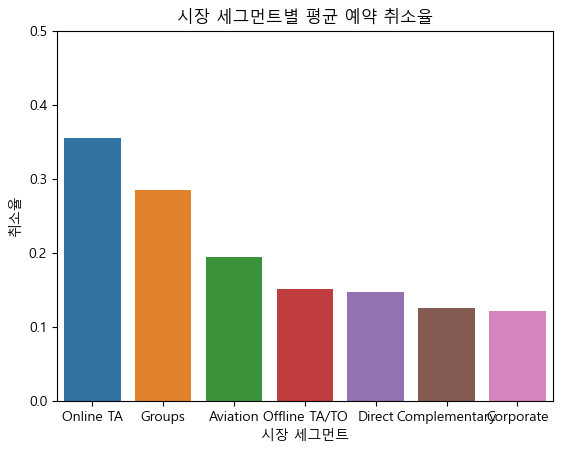

In [30]:
# 시각화

sns.barplot(x=market_canceled.index, y=market_canceled.values, hue=market_canceled.index)
plt.title('시장 세그먼트별 평균 예약 취소율')
plt.ylabel('취소율')
plt.xlabel('시장 세그먼트')
plt.ylim(0, 0.5)

#### - 유통 채널별 취소율 확인

In [31]:
# 유통 채널별 취소비율
dist_canceled = hotel_df.groupby('distribution_channel')['is_canceled'].mean().sort_values(ascending=False)
dist_canceled


distribution_channel
Undefined    0.800000
TA/TO        0.312130
GDS          0.198895
Direct       0.148706
Corporate    0.127404
Name: is_canceled, dtype: float64

In [32]:
# Undefined 취소율이 높아서 추가 확인
hotel_df['distribution_channel'].value_counts()

distribution_channel
TA/TO        68260
Direct       12824
Corporate     4992
GDS            181
Undefined        5
Name: count, dtype: int64

Undefined 취소율이 높아서 확인해보니, 데이터량이 부족하므로 무시

In [33]:
# Undefined 행 제거
dist_canceled = dist_canceled[dist_canceled.index != 'Undefined']
dist_canceled

distribution_channel
TA/TO        0.312130
GDS          0.198895
Direct       0.148706
Corporate    0.127404
Name: is_canceled, dtype: float64

(0.0, 0.5)

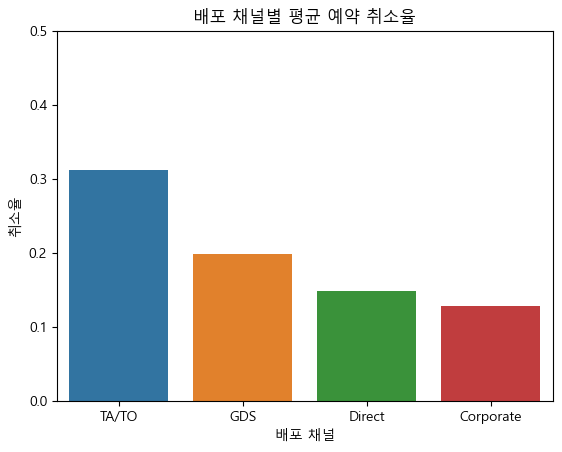

In [34]:
# 시각화
sns.barplot(x=dist_canceled.index, y=dist_canceled.values, hue=dist_canceled.index)
plt.title('배포 채널별 평균 예약 취소율')
plt.ylabel('취소율')
plt.xlabel('배포 채널')
plt.ylim(0, 0.5)

#### - 재방문 여부별 취소율 확인

In [35]:
# 재방문 여부별 취소비율
repeat_canceled = hotel_df.groupby('is_repeated_guest')['is_canceled'].mean()
repeat_canceled


is_repeated_guest
0    0.285180
1    0.076562
Name: is_canceled, dtype: float64

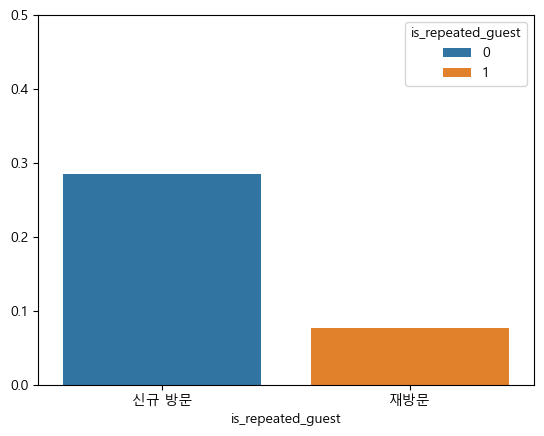

In [36]:
x_labels = {0: '신규 방문', 1: '재방문'}
sns.barplot(x=repeat_canceled.index.map(x_labels), y=repeat_canceled.values, hue=repeat_canceled.index)
plt.ylim(0, 0.5)
plt.show()

#### - 객실별 취소율 확인

In [37]:
# 객실별 취소비율
room_canceled = hotel_df.groupby('reserved_room_type')['is_canceled'].mean().sort_values(ascending=False)
room_canceled


reserved_room_type
P    1.000000
H    0.408403
G    0.358224
L    0.333333
C    0.325991
B    0.321827
D    0.302716
F    0.302383
E    0.274707
A    0.261841
Name: is_canceled, dtype: float64

In [38]:
# P, L 타입 취소율이 높아서 추가 확인
hotel_df['reserved_room_type'].value_counts()

reserved_room_type
A    55698
D    17234
E     5970
F     2811
G     2049
B      985
C      908
H      595
L        6
P        6
Name: count, dtype: int64

P와 L 취소율이 높아서 확인해보니, 데이터량이 부족하므로 무시

In [39]:
# L타입, P타입 제거
room_canceled = room_canceled[room_canceled.index != 'L']
room_canceled = room_canceled[room_canceled.index != 'P']
room_canceled

reserved_room_type
H    0.408403
G    0.358224
C    0.325991
B    0.321827
D    0.302716
F    0.302383
E    0.274707
A    0.261841
Name: is_canceled, dtype: float64

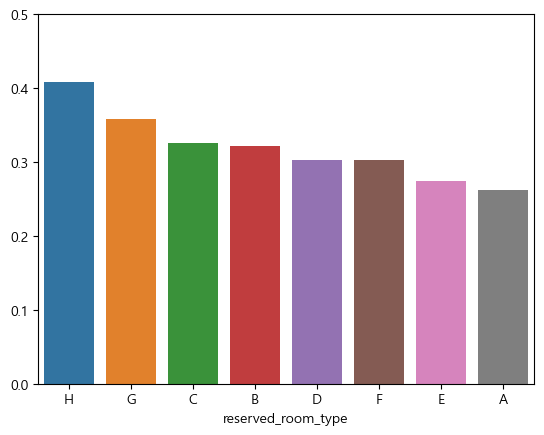

In [40]:
# 시각화
sns.barplot(x=room_canceled.index, y=room_canceled.values, hue=room_canceled.index)
plt.ylim(0, 0.5)
plt.show()

In [41]:
# 방 배정별 취소비율
assigned_room_canceled = hotel_df.groupby('assigned_room_type')['is_canceled'].mean().sort_values(ascending=False)
assigned_room_canceled


assigned_room_type
P    1.000000
L    1.000000
H    0.353191
A    0.308970
G    0.300722
F    0.247712
D    0.243521
E    0.237954
B    0.221293
C    0.185063
K    0.043636
I    0.014006
Name: is_canceled, dtype: float64

In [42]:
# P, L 타입 취소율이 높아서 추가 확인
hotel_df['assigned_room_type'].value_counts()

assigned_room_type
A    45574
D    22224
E     7098
F     3605
G     2494
C     2129
B     1794
H      705
I      357
K      275
P        6
L        1
Name: count, dtype: int64

P와 L 취소율이 높아서 확인해보니, 데이터량이 부족하므로 무시

In [43]:
# L타입, P타입 제거
assigned_room_canceled = assigned_room_canceled[assigned_room_canceled.index != 'L']
assigned_room_canceled = assigned_room_canceled[assigned_room_canceled.index != 'P']
assigned_room_canceled

assigned_room_type
H    0.353191
A    0.308970
G    0.300722
F    0.247712
D    0.243521
E    0.237954
B    0.221293
C    0.185063
K    0.043636
I    0.014006
Name: is_canceled, dtype: float64

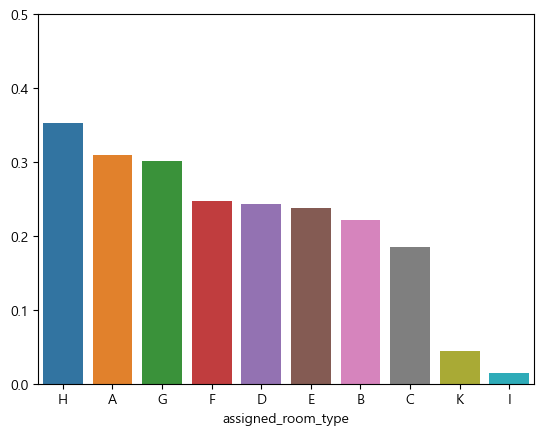

In [44]:
# 시각화
sns.barplot(x=assigned_room_canceled.index, y=assigned_room_canceled.values, hue=assigned_room_canceled.index)
plt.ylim(0, 0.5)
plt.show()

#### - 예약룸과 배정룸 다른 경우 취소율 확인

In [45]:
# 예약한 방과 할당받은 방이 다른 경우의 취소율
changed_canceled = hotel_df[hotel_df['assigned_room_type'] != hotel_df['reserved_room_type']]['is_canceled'].mean()
changed_canceled


np.float64(0.047395191122071516)

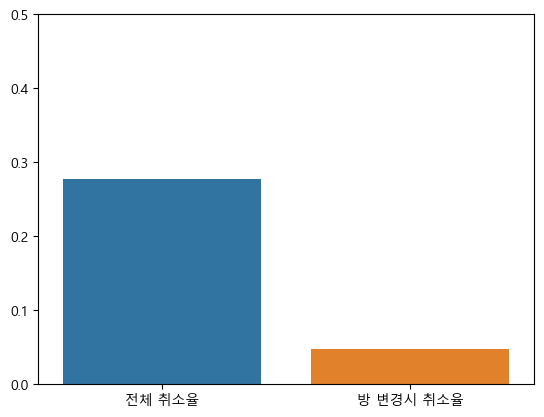

In [46]:
# 시각화

cancel_compare = {
    '전체 취소율': all_cancel_rate,
    '방 변경시 취소율': changed_canceled
}

sns.barplot(
    x=list(cancel_compare.keys()),   
    y=list(cancel_compare.values()), 
    hue=list(cancel_compare.keys()) 
)
plt.ylim(0, 0.5)
plt.show()

#### - 나라별 취소율 확인

In [47]:
# 나라별 관계

country_check = hotel_df.groupby('country', observed=True).agg(total_count=('is_canceled', 'count'),
                                                canceled_count=('is_canceled', 'sum'),
                                                cancel_rate=('is_canceled', 'mean'))

COUNT_NUM = 100
country_canceled = country_check[country_check['total_count'] >= COUNT_NUM].sort_values(['cancel_rate', 'total_count'], ascending=[False, False])

# 결측값 0으로 대체한 부분 삭제하기
country_canceled = country_canceled[country_canceled.index != 0]

country_canceled

,total_count,canceled_count,cancel_rate
country,,,
Angola,341,192,0.563050
China,814,391,0.480344
Turkey,211,97,0.459716
Russian Federation,559,222,0.397138
Brazil,1976,725,0.366903
Portugal,27178,9716,0.357495
Korea (South),118,42,0.355932
Italy,3037,1070,0.352321
Israel,391,132,0.337596


In [48]:
# 최다 예약순으로 정렬
country_total_count = country_canceled.sort_values(by='total_count', ascending=False)

country_total_count.head(5)

,total_count,canceled_count,cancel_rate
country,,,
Portugal,27178,9716,0.357495
United Kingdom,10177,1979,0.194458
France,8764,1727,0.197056
Spain,7129,1843,0.258522
Germany,5302,1050,0.198038


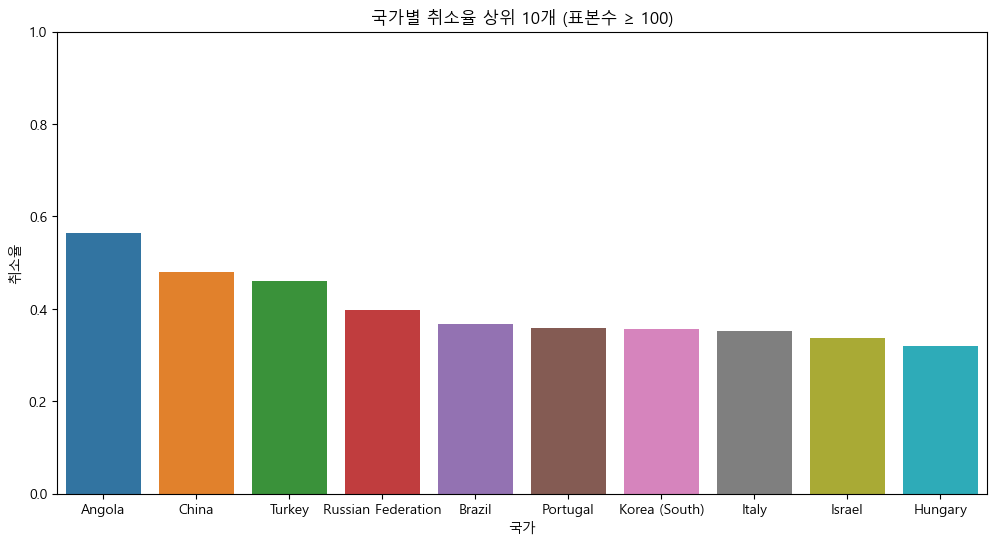

In [49]:
top_countries = country_canceled.head(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_countries, x='country', y='cancel_rate', hue='country')

plt.title('국가별 취소율 상위 10개 (표본수 ≥ 100)')
plt.xlabel('국가')
plt.ylabel('취소율')
plt.ylim(0, 1)

plt.show()

### - 수치형 요소

#### - 수치적 요소들과의 상관관계 확인하기

In [50]:
# 칼럼 중 취소와 관련된 수치적 요소 찾기
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

In [51]:
hotel_df['stays_in_all_nights'] = hotel_df['stays_in_week_nights']+hotel_df['stays_in_weekend_nights']

In [52]:
numeric_cols = [
    'lead_time',
    'stays_in_all_nights',
    'adults',
    'children',
    'babies',
    'previous_cancellations',
    'previous_bookings_not_canceled',
    'booking_changes',
    'days_in_waiting_list',
    'total_of_special_requests'
]


corr_df = hotel_df[numeric_cols + ['is_canceled']].corr()[['is_canceled']].sort_values(by='is_canceled', ascending=False)
corr_df


,is_canceled
is_canceled,1.000000
lead_time,0.191737
stays_in_all_nights,0.085982
adults,0.081003
children,0.066571
previous_cancellations,0.050534
days_in_waiting_list,0.005778
babies,-0.021014
previous_bookings_not_canceled,-0.052802
booking_changes,-0.093647


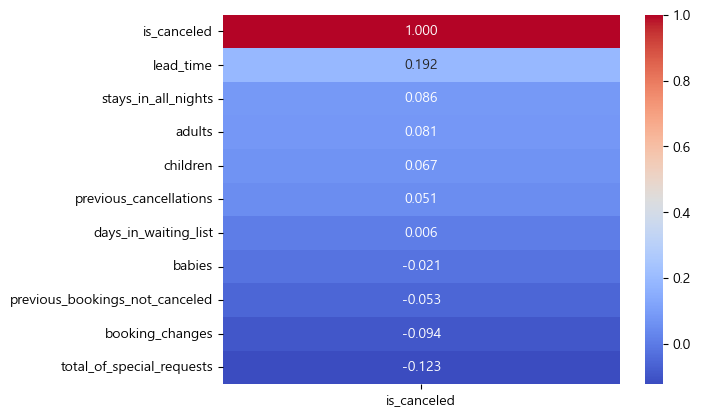

In [53]:
# 히트맵 작성

sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt=".3f")
plt.show()


#### - lead time과 취소 관계 확인하기

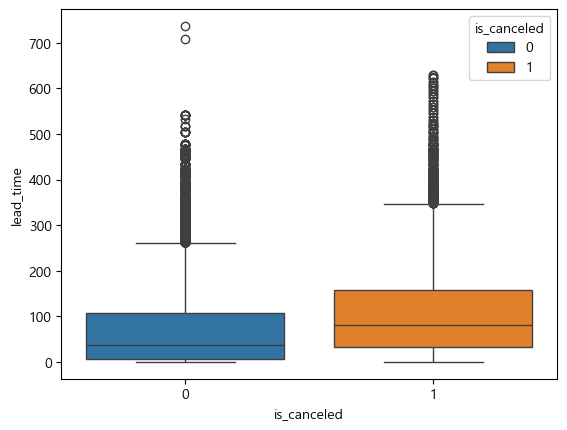

In [54]:
# 시각화
sns.boxplot(data=hotel_df, x='is_canceled', y='lead_time', hue='is_canceled')
plt.show()

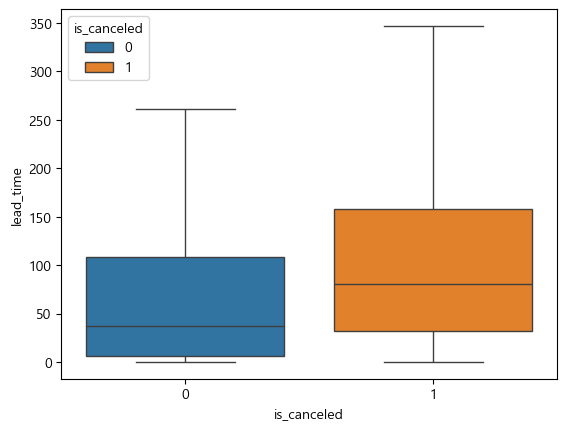

In [55]:
# 이상치를 숨긴 시각화

sns.boxplot(data=hotel_df, x='is_canceled', y='lead_time', hue='is_canceled', showfliers=False)
plt.show()


In [56]:
# 카테고리를 나눠서 확인

hotel_df['lead_time_cat'] = pd.cut(
    hotel_df['lead_time'],
    bins=[-1, 7, 30, 90, np.inf],
    labels=['1주 이내', '1달 이내', '3달 이내', '3달 초과']
)
hotel_df.groupby('lead_time_cat', observed=False)['is_canceled'].mean()

lead_time_cat
1주 이내    0.084361
1달 이내    0.254396
3달 이내    0.322041
3달 초과    0.373965
Name: is_canceled, dtype: float64

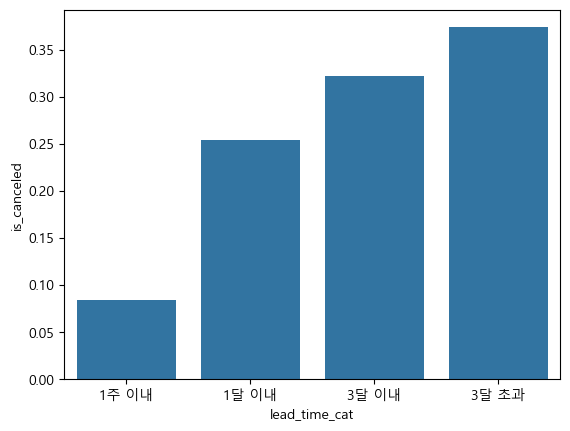

In [57]:
# 시각화

sns.barplot(
    data=hotel_df,
    x='lead_time_cat',
    y='is_canceled',
    order=['1주 이내', '1달 이내', '3달 이내', '3달 초과'],
    estimator='mean',
    errorbar=None
)

plt.show()

#### - 전체 특별 요청수와 취소 관계 확인하기

In [58]:
hotel_df['special_req_cat'] = pd.cut(
    hotel_df['total_of_special_requests'],
    bins=[-1, 0, 1, 10],
    labels=['요청 없음', '요청 1건', '요청 2건 이상'],
    )

hotel_df.groupby('special_req_cat', observed=True)['is_canceled'].mean()

special_req_cat
요청 없음       0.335347
요청 1건       0.225436
요청 2건 이상    0.204042
Name: is_canceled, dtype: float64

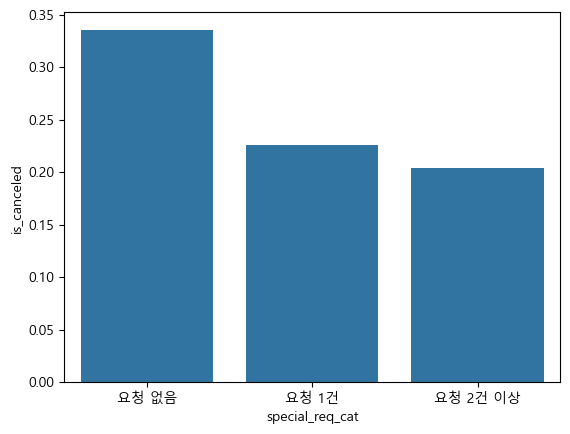

In [59]:
# 시각화

sns.barplot(
    data=hotel_df,
    x='special_req_cat',
    y='is_canceled',
    order=['요청 없음', '요청 1건', '요청 2건 이상'],
    estimator='mean',
    errorbar=None
)

plt.show()

#### - 전체 숙박 일수와 취소 관계 확인하기

In [60]:
hotel_df['stay_night_cat'] = pd.cut(
    hotel_df['stays_in_all_nights'],
    bins=[-1, 3, 7, 30, 70],
    labels=['3박 이내', '일주일 이내', '한달 이내', '70일 이내'],
    )

hotel_df.groupby('stay_night_cat', observed=True)['is_canceled'].mean()

stay_night_cat
3박 이내     0.249311
일주일 이내    0.312130
한달 이내     0.345256
70일 이내    0.173913
Name: is_canceled, dtype: float64

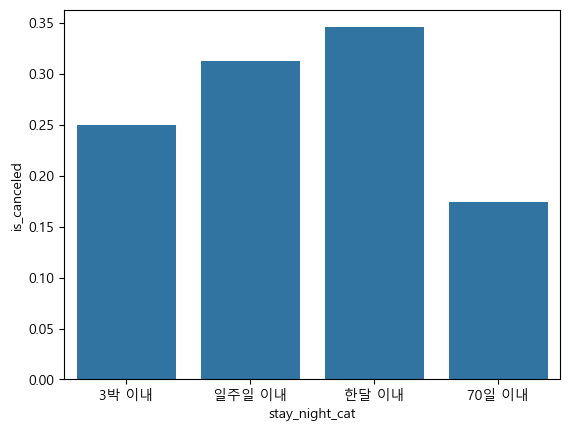

In [61]:
# 시각화

sns.barplot(
    data=hotel_df,
    x='stay_night_cat',
    y='is_canceled',
    order=['3박 이내', '일주일 이내', '한달 이내', '70일 이내'],
    estimator='mean',
    errorbar=None
)

plt.show()

In [62]:
hotel_df['stay_night_cat2'] = pd.cut(
    hotel_df['stays_in_all_nights'],
    bins=[-1, 3, 7, 14, 21, 30, 70],
    labels=['3박 이내', '7일 이내', '2주일 이내', '3주일 이내', '30일 이내', '70일 이내'],
    )


summary = hotel_df.groupby('stay_night_cat2', observed=True).agg(
    total_count=('is_canceled', 'count'),
    canceled_count=('is_canceled', 'sum'),
    cancel_rate=('is_canceled', 'mean')
)

summary

,total_count,canceled_count,cancel_rate
stay_night_cat2,,,
3박 이내,50784,12661,0.249311
7일 이내,30702,9583,0.312130
2주일 이내,4406,1455,0.330232
3주일 이내,238,124,0.521008
30일 이내,109,62,0.568807
70일 이내,23,4,0.173913


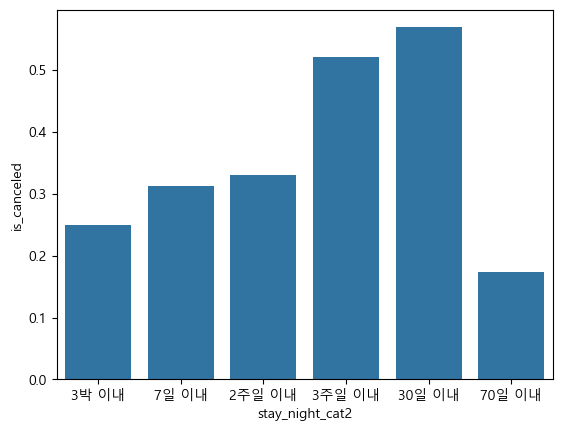

In [63]:
# 시각화

sns.barplot(
    data=hotel_df,
    x='stay_night_cat2',
    y='is_canceled',
    order=['3박 이내', '7일 이내', '2주일 이내', '3주일 이내', '30일 이내', '70일 이내'],
    estimator='mean',
    errorbar=None
)

plt.show()

#### - 평일, 주말 숙박 일수와 취소 관계 확인하기

In [64]:
# 평일 숙박 통계
weekday_stats = hotel_df.groupby('stays_in_week_nights')['is_canceled'].agg(
    total_count='count',
    canceled_count='sum',
    cancel_rate='mean'
)
# 평일 숙박 통계 (전체 건수 > 100만)
weekday_stats_filtered = weekday_stats[weekday_stats['total_count'] > 100]

weekday_stats_filtered


,total_count,canceled_count,cancel_rate
stays_in_week_nights,,,
0,6111,1139,0.186385
1,21942,4902,0.223407
2,20469,5930,0.289706
3,16063,4833,0.300878
4,7786,2545,0.326869
5,9477,3010,0.317611
6,1359,518,0.381163
7,948,295,0.311181
8,602,197,0.327243


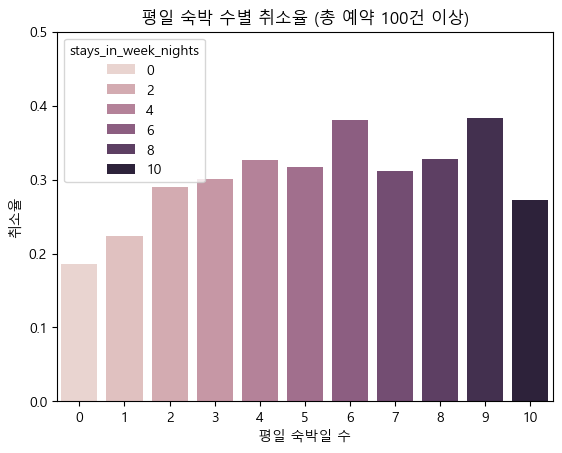

In [65]:
# 시각화

sns.barplot(
    x=weekday_stats_filtered.index,
    y=weekday_stats_filtered['cancel_rate'],
    hue=weekday_stats_filtered.index  
)
plt.ylim(0, 0.5)
plt.title('평일 숙박 수별 취소율 (총 예약 100건 이상)')
plt.xlabel('평일 숙박일 수')
plt.ylabel('취소율')
plt.show()

In [66]:
# 주말 숙박 통계
weekend_stats = hotel_df.groupby('stays_in_weekend_nights')['is_canceled'].agg(
    total_count='count',
    canceled_count='sum',
    cancel_rate='mean'
)
# 주말 숙박 통계 (전체 건수 > 100만)
weekend_stats_filtered = weekend_stats[weekend_stats['total_count'] > 100]


weekend_stats_filtered

,total_count,canceled_count,cancel_rate
stays_in_weekend_nights,,,
0,34737,8636,0.248611
1,22362,6171,0.275959
2,26052,8037,0.308498
3,1130,381,0.337168
4,1694,518,0.305785
6,111,56,0.504505


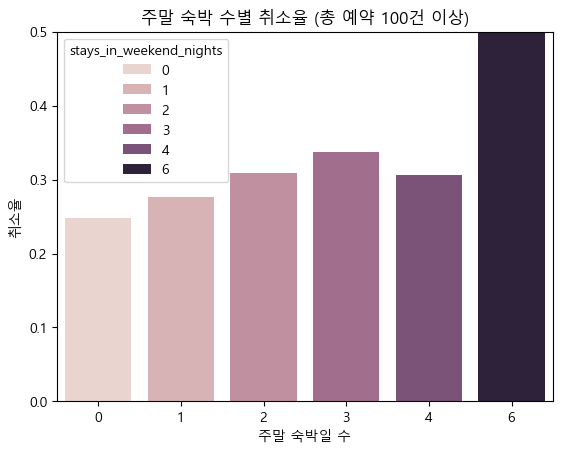

In [67]:
# 시각화

sns.barplot(
    x=weekend_stats_filtered.index,
    y=weekend_stats_filtered['cancel_rate'],
    hue=weekend_stats_filtered.index  
)
plt.ylim(0, 0.5)
plt.title('주말 숙박 수별 취소율 (총 예약 100건 이상)')
plt.xlabel('주말 숙박일 수')
plt.ylabel('취소율')
plt.show()

#### - 예약 변경과 취소 관계 확인하기

In [68]:
hotel_df['booking_changes'].value_counts()

booking_changes
0     70617
1     10692
2      3469
3       869
4       355
5       115
6        59
7        31
8        17
9         8
10        6
14        5
13        5
15        3
17        2
16        2
12        2
11        2
20        1
21        1
18        1
Name: count, dtype: int64

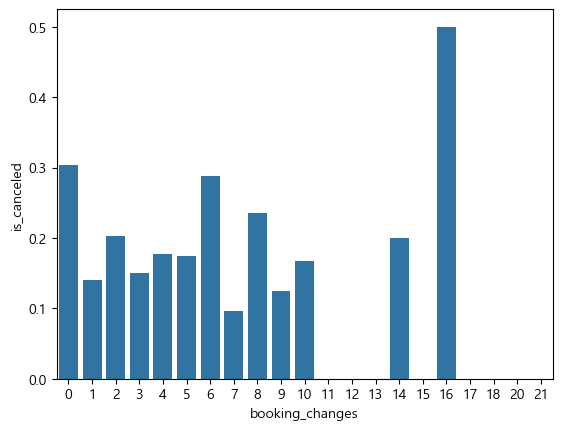

In [69]:
# 시각화

sns.barplot(
    data=hotel_df,
    x='booking_changes',
    y='is_canceled',
    estimator='mean',
    errorbar=None
)

plt.show()

16번은 데이터량 부족으로 무시. 

그외 데이터는 큰 상관관계는 보이지 않음.

#### - 연도와 월별 취소 관계 확인하기

In [70]:
# 연도별 취소율 

hotel_df.groupby('arrival_date_year')['is_canceled'].mean()



arrival_date_year
2015    0.203405
2016    0.266707
2017    0.321380
Name: is_canceled, dtype: float64

In [71]:
# 월별 취소율 
 
monthly_cancel_num = hotel_df.groupby('arrival_date_month')['is_canceled'].mean()
monthly_cancel_num = monthly_cancel_num.sort_values(ascending=False)

monthly_cancel_num

arrival_date_month
August       0.323545
July         0.319324
April        0.307042
June         0.305487
May          0.295024
December     0.269813
September    0.248133
March        0.245749
October      0.239818
February     0.233350
January      0.222510
November     0.212103
Name: is_canceled, dtype: float64

In [72]:
# arrival_date_month 데이터를 숫자형으로 표현하기
hotel_df['arrival_date_month'] = hotel_df['arrival_date_month'].str.replace('January',"1", regex=False)
hotel_df['arrival_date_month'] = hotel_df['arrival_date_month'].str.replace('February',"2", regex=False)
hotel_df['arrival_date_month'] = hotel_df['arrival_date_month'].str.replace('March',"3", regex=False)
hotel_df['arrival_date_month'] = hotel_df['arrival_date_month'].str.replace('April',"4", regex=False)
hotel_df['arrival_date_month'] = hotel_df['arrival_date_month'].str.replace('May',"5", regex=False)
hotel_df['arrival_date_month'] = hotel_df['arrival_date_month'].str.replace('June',"6", regex=False)
hotel_df['arrival_date_month'] = hotel_df['arrival_date_month'].str.replace('July',"7", regex=False)
hotel_df['arrival_date_month'] = hotel_df['arrival_date_month'].str.replace('August',"8", regex=False)
hotel_df['arrival_date_month'] = hotel_df['arrival_date_month'].str.replace('September',"9", regex=False)
hotel_df['arrival_date_month'] = hotel_df['arrival_date_month'].str.replace('October',"10", regex=False)
hotel_df['arrival_date_month'] = hotel_df['arrival_date_month'].str.replace('November',"11", regex=False)
hotel_df['arrival_date_month'] = hotel_df['arrival_date_month'].str.replace('December',"12", regex=False)

hotel_df['arrival_date_month']=hotel_df['arrival_date_month'].astype(int)

In [73]:
hotel_df['arrival_date_month'].info()

<class 'pandas.core.series.Series'>
Index: 86262 entries, 0 to 119389
Series name: arrival_date_month
Non-Null Count  Dtype
--------------  -----
86262 non-null  int64
dtypes: int64(1)
memory usage: 1.3 MB


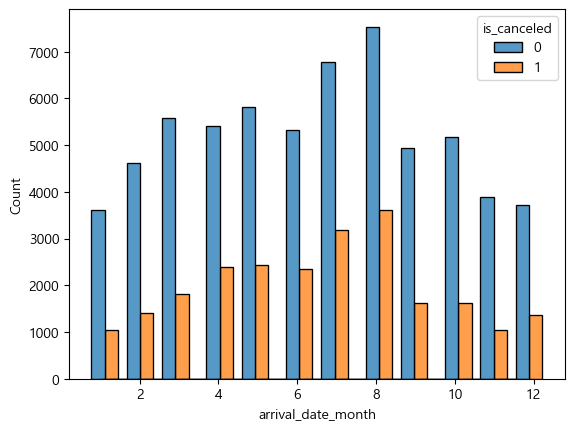

In [74]:
sns.histplot(data=hotel_df, x='arrival_date_month', hue='is_canceled', multiple='dodge', shrink=3)
plt.show()

In [75]:
# 연도와 월별 취소율 확인

year_month_canceled = hotel_df.groupby(['arrival_date_year', 'arrival_date_month'])['is_canceled'].mean().reset_index(name='cancel_rate')

year_month_pivot = year_month_canceled.pivot(index='arrival_date_year',columns='arrival_date_month',values='cancel_rate')
year_month_pivot

arrival_date_month,1,2,3,4,5,6,7,8,9,10,11,12
arrival_date_year,,,,,,,,,,,,
2015,NaN,NaN,NaN,NaN,NaN,NaN,0.305840,0.232702,0.198642,0.164286,0.146845,0.187755
2016,0.164195,0.188933,0.232866,0.271287,0.251818,0.260807,0.283382,0.327910,0.284955,0.288336,0.244762,0.321280
2017,0.260206,0.270617,0.259157,0.339613,0.330462,0.342374,0.354724,0.369936,NaN,NaN,NaN,NaN


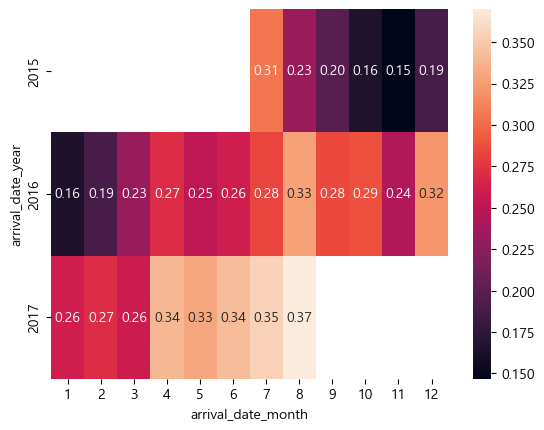

In [76]:
# 히트맵 작성
sns.heatmap(year_month_pivot, annot=True, fmt=".2f")
plt.show()

### - 결합적 요소

#### - 호텔별 취소와 상관관계 확인하기

In [77]:
# Resort Hotel 데이터 상관관계
resort_hotel_df = hotel_df[hotel_df['hotel'] == 'Resort Hotel']
resort_corr_df = resort_hotel_df[numeric_cols + ['is_canceled']].corr()[['is_canceled']].rename(columns={'is_canceled': 'Resort Hotel'})

# City Hotel 데이터 상관관계
city_hotel_df = hotel_df[hotel_df['hotel'] == 'City Hotel']
city_corr_df = city_hotel_df[numeric_cols + ['is_canceled']].corr()[['is_canceled']].rename(columns={'is_canceled': 'City Hotel'})

# 두 호텔 상관계수 합치기
combined_corr_df = resort_corr_df.join(city_corr_df)
combined_corr_df['diff'] = combined_corr_df['Resort Hotel'] - combined_corr_df['City Hotel']

combined_corr_df = combined_corr_df.sort_values(by='diff', ascending=False)

combined_corr_df

,Resort Hotel,City Hotel,diff
total_of_special_requests,-0.052464,-0.166410,0.113947
children,0.121396,0.034806,0.086590
previous_cancellations,0.070090,0.038281,0.031809
babies,-0.014248,-0.021695,0.007447
booking_changes,-0.088584,-0.092756,0.004172
lead_time,0.196324,0.193845,0.002479
is_canceled,1.000000,1.000000,0.000000
adults,0.081063,0.083789,-0.002726
stays_in_all_nights,0.103311,0.112763,-0.009452
previous_bookings_not_canceled,-0.073455,-0.048930,-0.024524


In [78]:
# 호텔별 차이가 가장 큰 특별 요청 건의 취소율 계산
# 리조트 호텔

special_resort_cancel = resort_hotel_df.groupby('total_of_special_requests')['is_canceled'].mean()
special_resort_cancel

total_of_special_requests
0    0.259095
1    0.216076
2    0.222298
3    0.168269
4    0.104478
5    0.071429
Name: is_canceled, dtype: float64

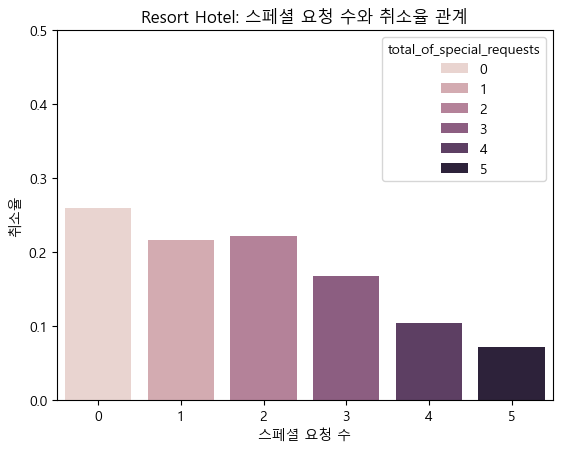

In [79]:
# 시각화
sns.barplot(
    x=special_resort_cancel.index,
    y=special_resort_cancel.values,
    hue=special_resort_cancel.index  
)
plt.ylim(0, 0.5)
plt.title('Resort Hotel: 스페셜 요청 수와 취소율 관계')
plt.xlabel('스페셜 요청 수')
plt.ylabel('취소율')
plt.show()

In [80]:
# 호텔별 차이가 가장 큰 특별 요청 건의 취소율 계산
# 씨티 호텔

special_city_cancel = city_hotel_df.groupby('total_of_special_requests')['is_canceled'].mean()
special_city_cancel

total_of_special_requests
0    0.385664
1    0.231092
2    0.208665
3    0.170981
4    0.109890
5    0.045455
Name: is_canceled, dtype: float64

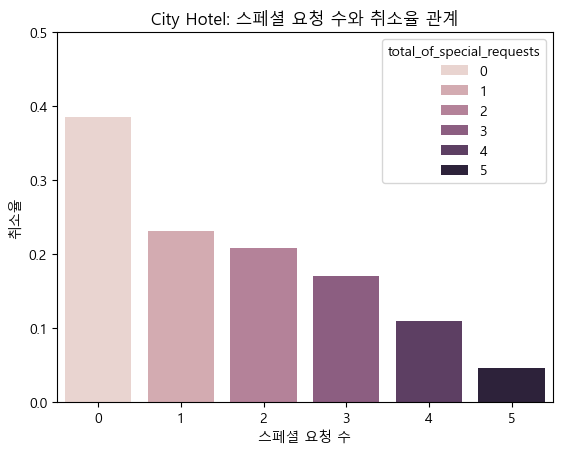

In [81]:
# 시각화

sns.barplot(
    x=special_city_cancel.index,
    y=special_city_cancel.values,
    hue=special_city_cancel.index  
)
plt.ylim(0, 0.5)
plt.title('City Hotel: 스페셜 요청 수와 취소율 관계')
plt.xlabel('스페셜 요청 수')
plt.ylabel('취소율')
plt.show()

#### - lead time과 특별 요청 상관관계 확인하기

In [82]:
lead_req_cancel_rate = hotel_df.pivot_table(
    values='is_canceled',
    index='lead_time_cat',
    columns='special_req_cat',
    aggfunc='mean',
    observed=True
)

lead_req_cancel_rate

special_req_cat,요청 없음,요청 1건,요청 2건 이상
lead_time_cat,,,
1주 이내,0.102700,0.058285,0.059775
1달 이내,0.323401,0.208540,0.164227
3달 이내,0.405151,0.258960,0.221335
3달 초과,0.461254,0.301526,0.271174


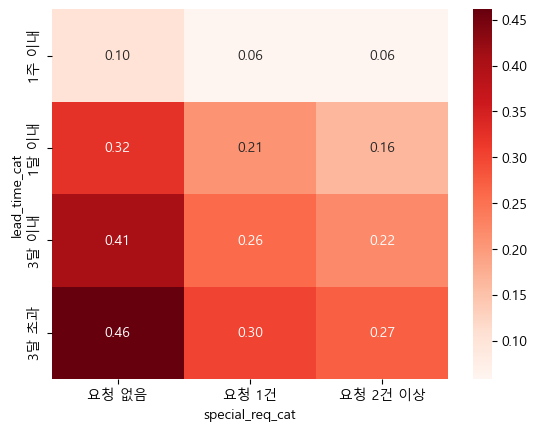

In [83]:
# 시각화

sns.heatmap(
    lead_req_cancel_rate,
    annot=True,
    fmt=".2f",
    cmap="Reds"
)

plt.show()

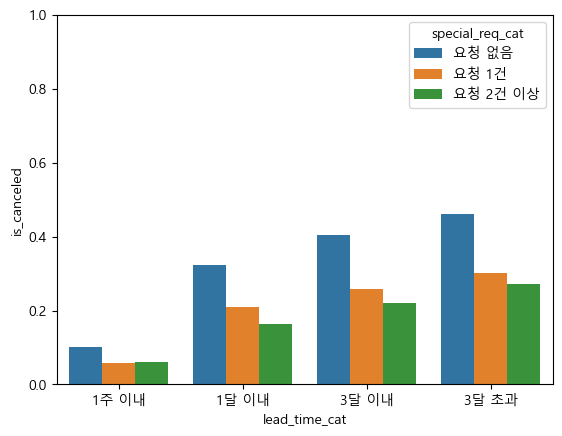

In [84]:
# 시각화

sns.barplot(
    data=hotel_df,
    x='lead_time_cat',
    y='is_canceled',
    hue='special_req_cat',
    estimator='mean',
    errorbar=None
)

plt.ylim(0, 1)
plt.show()

#### - 예약 변경과 숙박 일수 상관관계 확인하기

In [85]:
hotel_df['booking_changed'] = (hotel_df['booking_changes'] > 0).astype(int)

stay_change_pivot = hotel_df.pivot_table(
    values='is_canceled',
    index='stay_night_cat',
    columns='booking_changed',
    aggfunc='mean',
    observed=True
)

stay_change_pivot

booking_changed,0,1
stay_night_cat,,
3박 이내,0.273599,0.130872
일주일 이내,0.341948,0.186780
한달 이내,0.391257,0.191217
70일 이내,0.230769,0.100000


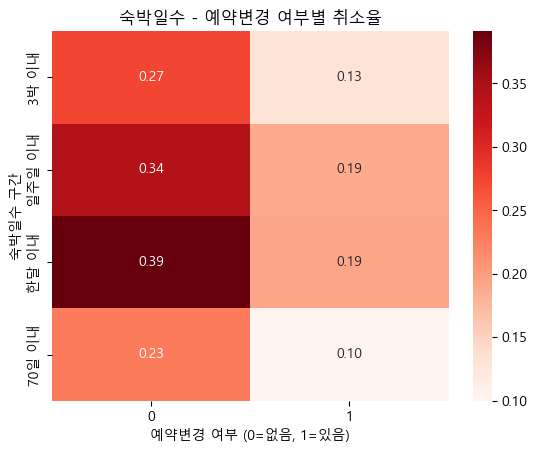

In [86]:
# 시각화

sns.heatmap(
    stay_change_pivot,
    annot=True,
    fmt=".2f",
    cmap="Reds"
)

plt.title('숙박일수 - 예약변경 여부별 취소율')
plt.xlabel('예약변경 여부 (0=없음, 1=있음)')
plt.ylabel('숙박일수 구간')
plt.show()

#### - lead time과 재방문 여부 상관관계 확인하기

In [87]:
lead_repeat_pivot = hotel_df.pivot_table(
    values='is_canceled',
    index='lead_time_cat',
    columns='is_repeated_guest',
    aggfunc='mean',
    observed=True
)

lead_repeat_pivot

is_repeated_guest,0,1
lead_time_cat,,
1주 이내,0.088964,0.055083
1달 이내,0.259861,0.102837
3달 이내,0.323649,0.125683
3달 초과,0.374931,0.227979


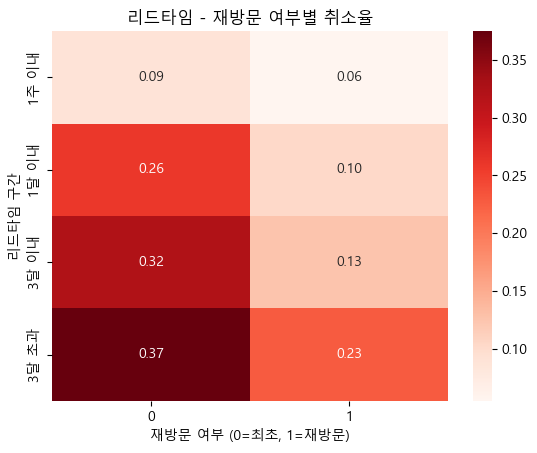

In [88]:
# 시각화

sns.heatmap(
    lead_repeat_pivot,
    annot=True,
    fmt=".2f",
    cmap="Reds"
)

plt.title('리드타임 - 재방문 여부별 취소율')
plt.xlabel('재방문 여부 (0=최초, 1=재방문)')
plt.ylabel('리드타임 구간')
plt.show()

# 전체 결과 모음

이 호텔의 전체 취소율은 27.7% 이다.

호텔별 취소율은 City Hotel 30.2%, Resort Hotel 23.7% 로 City hotel 의 취소율이 높은 편이다.

식사별 취소율은 SC 35.5%, FB 27.6%, HB 27.5%, BB 26.7% 로 SC의 취소율이 높은 편이다.


시장 세그먼트별 취소율은 Online TA 35.5% Groups 28.5 Aviation 19.5 로 Online TA의 취소율이 높은 편이다.


유통 채널별 취소율은 TA/TO 31.2 GDS 19.9 Direct 14.9로 TA/TO의 취소율이 높은 편이다.


재방문 여부별 취소율은 첫 방문 28.5% 재방문 7.7%로 첫 방문의 취소율이 높은 편이다..


객실별 취소율은 유의미한 인사이트를 얻지 못하였다.


나라별 취소율은 Angola 56.3% , China 48.0% , Turkey 46.0% 순으로 높았고, 최다 예약건은 Portugal 27178건, UK 10177건, France 8764건 으로 높았다.

취소율과 상관관계는 lead_time 19.2% , total_of_special_requests	-12.3%, booking_changes	-9.4%, stays_in_all_nights 8.6% 순으로 관계가 있다.

lead time의 구간별 취소율은 1주 이내 8.4%,  1달 이내 25.4%,  3달 이내 32.2%,  3달 초과 37.4%로 길어질수록 취소율이 높아졌다.

특별 요청수의 요청건수 별 취소율은 요청 없을시 33.5%,  요청 1건시 22.5% , 요청 2건 이상시 20.4% 로 요청이 많을 수록 취소율이 낮아졌다.

숙박 일수별 취소율은 전체 숙박일, 평일 숙박일, 주말 숙박일 모두 길어질수록 취소율이 높아졌다.

예약 변경과 취소율은 유의미한 인사이트를 얻지 못하였다.

연도별 취소율은  2015년 20.3% 2016년 26.7% 2017 32.1% 로 해가 지날수록 높아졌다.

월별 취소율은 8월 32.4%,  7월 32.0%, 4월 30.7% 로 2분기, 3분기가 취소율이 높은 편이다.


Resort hotel은 특별 요청수가 0건일 경우 취소율이 25.9%지만, City hotel은 특별 요청수가 0건일 경우 취소율이 38.6% 로 높은 편이다.

lead time과 특별 요청과의 취소율 관계를 보았을 때는, 단일값으로 취소율을 확인했을 때와 같이 lead time이 길어질 수록 취소율이 높아지고, 특별 요청이 적을수록 취소율이 높다.

예약 변경과 숙박일수와의 취소율 관계를 보았을 때는, 예약 변경을 하지 않고, 숙박 일수가 짧은것 보다 예약 변경을 하고 숙박일수가 길수록 취소율이 높다.

lead time과 재방문 여부와의 취소율 관계를 보았을 때는, 단일값으로 취소율을 확인했을 때와 같이, 첫 방문자가 lead time이 길어질 수록 취소율이 높아진다.



# 결론 - 호텔 예약 취소 분석


## 1. 주요 결과

### - 호텔 유형 및 고객 관여도

호텔별 차이 : City Hotel의 취소율이 Resort Hotel보다 전반적으로 높게 나타남.

특별 요청 : 두 호텔 모두 특별 요청 건수가 많을수록 취소율이 낮아지는 경향을 보임.

특히 City Hotel은 특별 요청이 0건일 때 취소율이 **38.6%**로 매우 높음 (Resort Hotel 25.9% 대비).

### - 시간적 요인 

리드 타임(Lead Time) : 예약 시점부터 실제 도착일까지의 기간이 길어질수록 취소율이 상승함.

숙박 기간 : 전체 숙박일, 평일 및 주말 숙박일수와 취소율은 양의 상관 관계 (숙박 기간이 길수록 취소율 증가함)

### - 시기 

연도별 추세: 2015년(20.3%) → 2016년(26.7%) → 2017년(32.1%)으로 매년 취소율이 유의미하게 상승

월별 추세: 8월(32.4%), 7월(32.0%), 4월(30.7%) 순으로 높으며, 주로 2~3분기에 취소가 집중됨.

<br>

<br>


## 2. 예약 취소율 개선 아이디어

<br>

* City Hotel의 문제점 분석 : 현재 데이터로는 나와있지 않은 City Hotel 문제점의 개선방안을 찾아 취소율을 낮춘다. 

-> 근거 : Resort hotel에 비해 City hotel의 취소율이 높음

<br>

* High risk 상품 : 취소율이 높은 결과(식사 - SC // 시장 세그먼트 - Online TA, 유통 채널 - TA/TO)가 묶인 예약건은 호텔에서 이용할 수 있는 무료 바우처를 제공하여 서비스에 대한 기대치를 높여 취소율을 낮춘다.

-> 근거 : 각각의 범주형 데이터 별로 취소율이 높은 요소들을 해결할 수 있는 방안

<br>

* 환불 불가 상품 : 리드 타임이 긴 예약이나 성수기(7~8월) 예약에 대해 가격이 저렴한 환불 불가형 옵션을 제안하여 노쇼를 방지.

-> 근거 : 리드 타임이 길어지고, 특정 시기(8월, 7월, 4월)의 취소율이 높은 요소들을 해결할 수 있는 방안

<br>

* 웰컴 키트 전달 : 리드 타임이 긴 고객에게 호텔 인근 맛집 가이드나 이벤트 정보를 담은 웰컴 키트을 발송하여 방문 기대감을 상승시켜 취소율을 낮춘다.

-> 근거 : 리드 타임이 길어질수록 취소율이 높은 요소를 해결할 수 있는 방안

<br>

* 재방문 웰컴 상품 : 재방문의 경우, 웰컴 상품을 제공하여 첫 방문이 재방문으로 이어질 수 있도록 하여 취소율을 낮춘다.

-> 근거 : 재방문의 경우, 취소율이 낮아지는 것을 이용하여 재방문을 유도하는 방안

<br>

* 보증금 제도 도입: 일정 기간 이상의 장기 숙박 예약 시 보증금 결제를 필수화하여 취소율을 낮춘다.

-> 근거 : 숙박일수가 길어짐에 따라 취소율이 높아지는 것을 막을 수 있는 방안

<br>

* 특별 요청 유도: 예약 과정에서 선호하는 객실 위치, 추가 어매니티 등 간단한 옵션을 제공하여 본인이 특별 요청을 따로 한 것으로 생각하게 하여 취소율을 낮춘다.

-> 근거 : 특별 요청수이 많아질수록 취소율이 낮아지는 것을 이용한 방안

<br>


* 리마인더 알림 : 취소율이 급증하는 2, 3분기 및 장기 숙박에 대해 예약을 리마인드 시켜줄 알람을 주기적으로 발송시키면서 기대감을 상승시켜 취소율을 낮춘다.

-> 근거 : 특정시기 및 숙박일수가 길어짐에 따라 취소율이 높아지는 것을 막을 수 있는 방안

<br>

* 오버부킹 시스템 : 취소율이 많은 기간동안 오버부킹 범위를 늘려 손실을 최소화한다.

-> 근거 : 예약한 객실과 배정받은 객실의 차이가 있음에도 취소율이 높지 않기에, 오버부킹을 통하여 공실을 최소화할 수 있어 매출에 도움이 되는 방안